In [8]:
from zipdl.data import db
from zipdl.data import models as m
from zipdl.utils import utils
from dateutil import parser

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import pandas as pd
import numpy as np

%matplotlib inline

In [22]:
plt.rcParams["figure.figsize"] = [16,9]

In [11]:
session = db.create_session()
items = session.query(m.Market_Metric).all()

vix


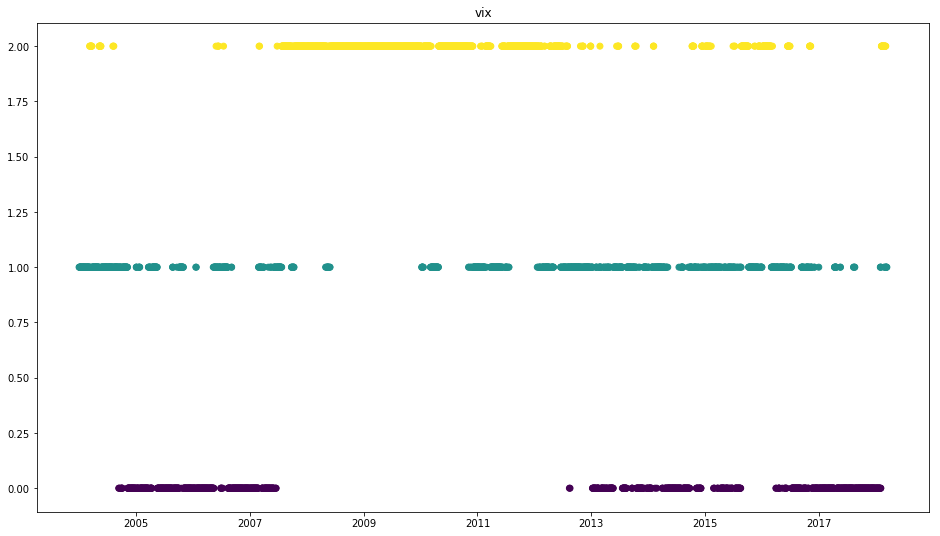

vixD1w


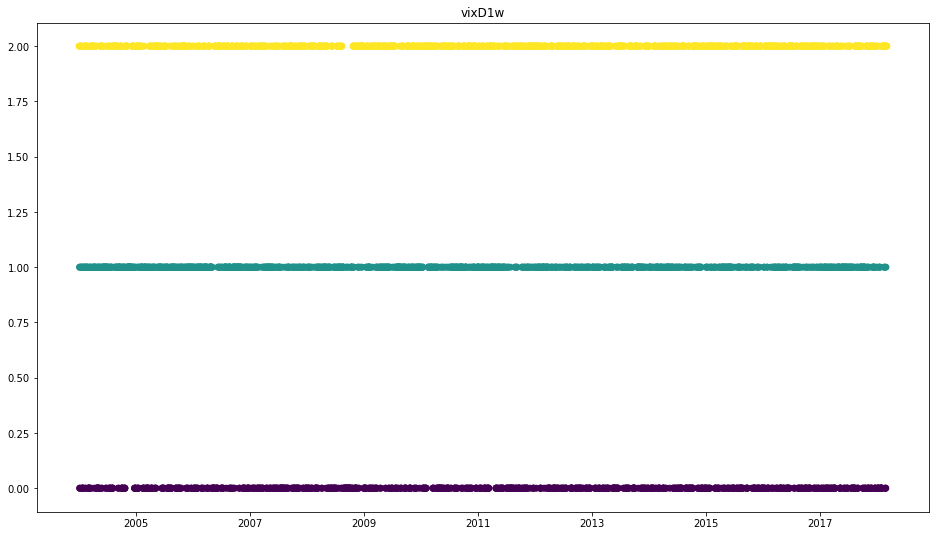

vixD1m


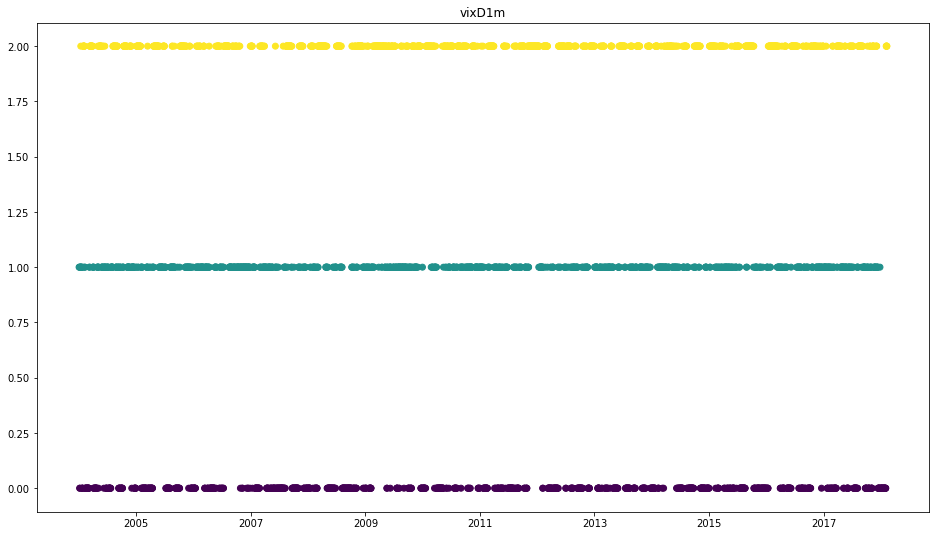

vixD2w


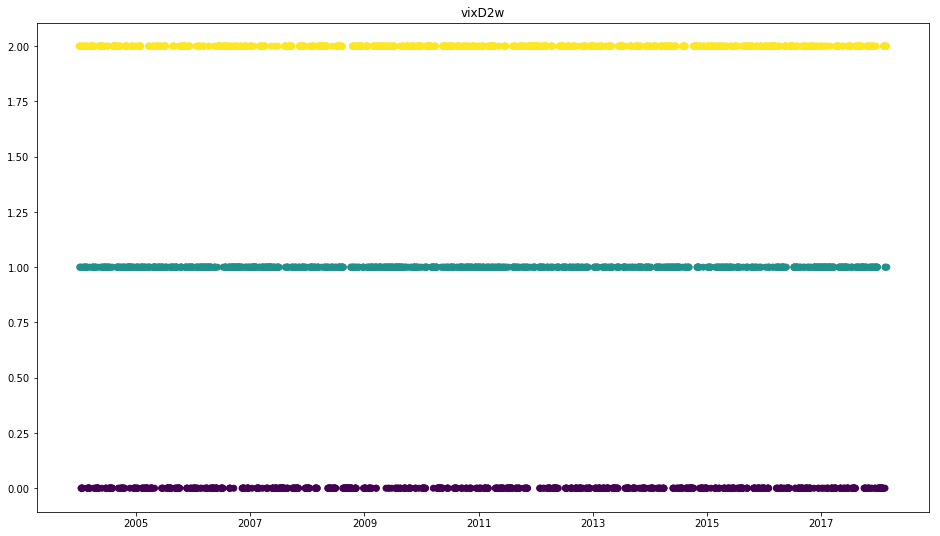

personal savings


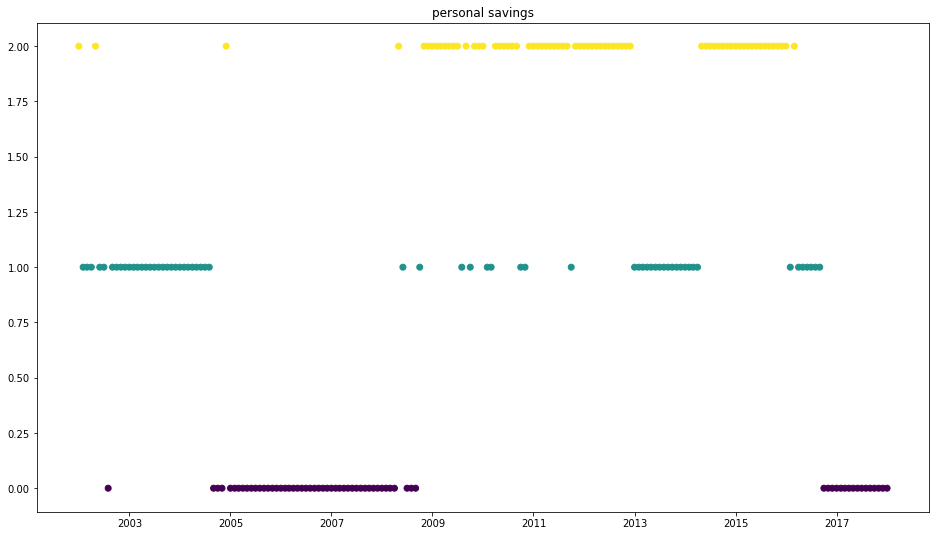

ps-1mdelat


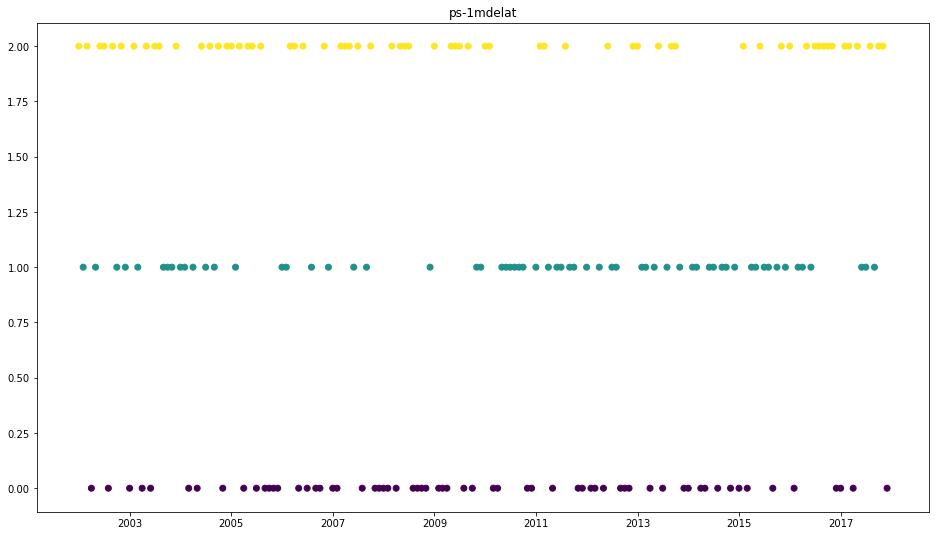

t3m


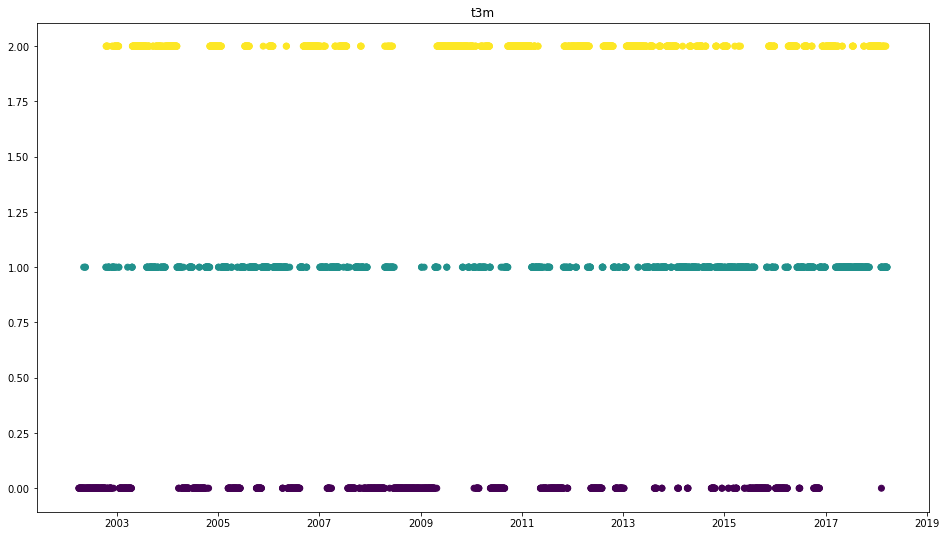

t6m


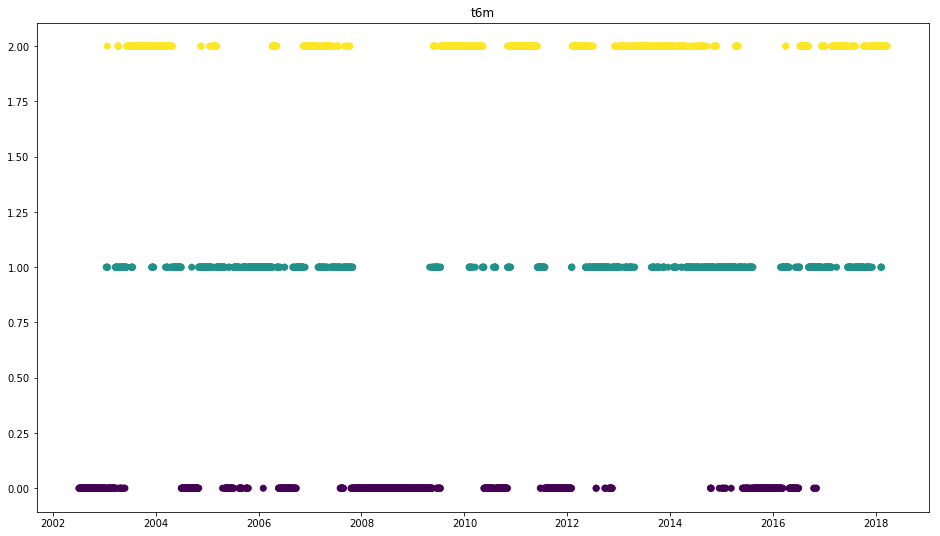

ttm


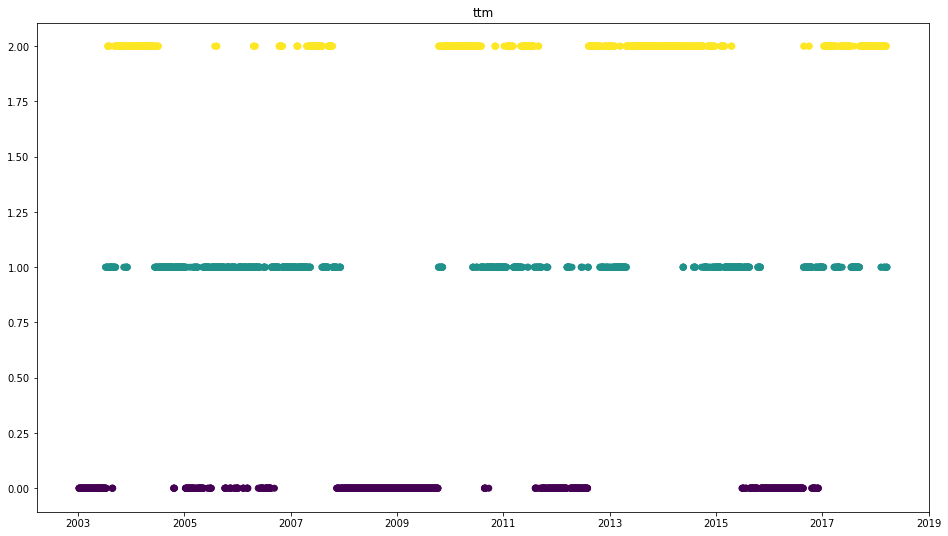

In [12]:
colors = {(0, 1): 'r', (1,2): 'b', (2,3):'g'}
for item in items:
    print(item.metric)
    series = pd.Series(item.time_series)
    utils.strings_to_date(series)
    xseries = [x for x in series]
    new_series = np.array([utils.METRIC_DICT[item.metric](val) for val in xseries])    
    plt.scatter(series.index, new_series, c=new_series, cmap='viridis')
    plt.title(item.metric)
    plt.show()

In [13]:
scaling = [1, 3, 9] #For visualization purposes, so we can see when different states occur
def visualize_state_distribution(ENV_METRICS, title='2d'):
    #2D Visualization
    metric1 = [item for item in items if item.metric==ENV_METRICS[0]][0]
    metric2 = [item for item in items if item.metric==ENV_METRICS[1]][0]
    metric3 = [item for item in items if item.metric==ENV_METRICS[2]][0]
    series1= pd.Series(metric1.time_series)
    utils.strings_to_date(series1)
    series2 = pd.Series(metric2.time_series)
    utils.strings_to_date(series2)
    series3 = pd.Series(metric3.time_series)
    utils.strings_to_date(series3)
    df = pd.concat([series1, series2, series3], axis=1).fillna(method='ffill')
    df = df['20040102':'20171201']
    bucket1 = pd.Series([utils.METRIC_DICT[ENV_METRICS[0]](val) for val in df[0]])
    bucket2 = pd.Series([utils.METRIC_DICT[ENV_METRICS[1]](val) for val in df[1]])
    bucket3 = pd.Series([utils.METRIC_DICT[ENV_METRICS[2]](val) for val in df[2]])
    df2 = pd.concat([bucket1, bucket2, bucket3], axis=1)
    scalings = df2.as_matrix() @ scaling
    plt.scatter(df.index, scalings, c=scalings, cmap='viridis')
    plt.title(title)
    plt.show()

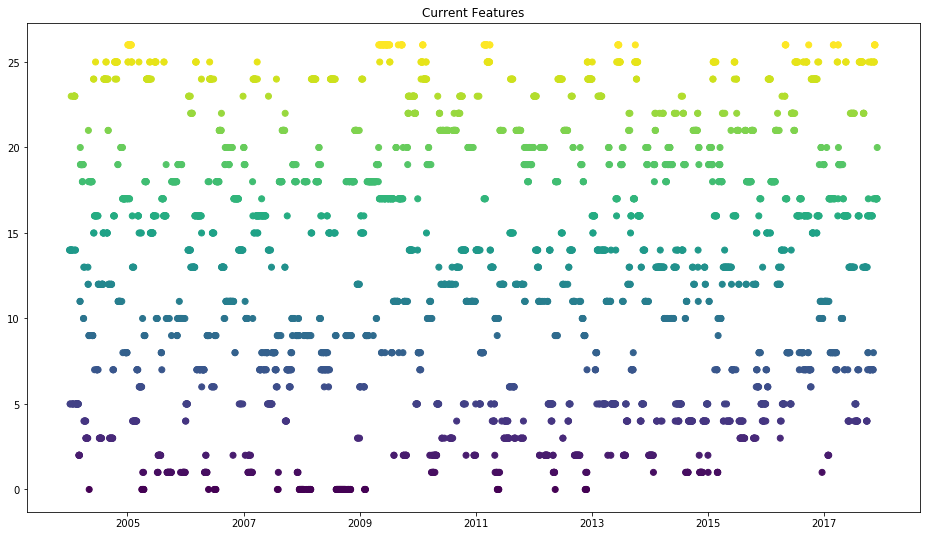

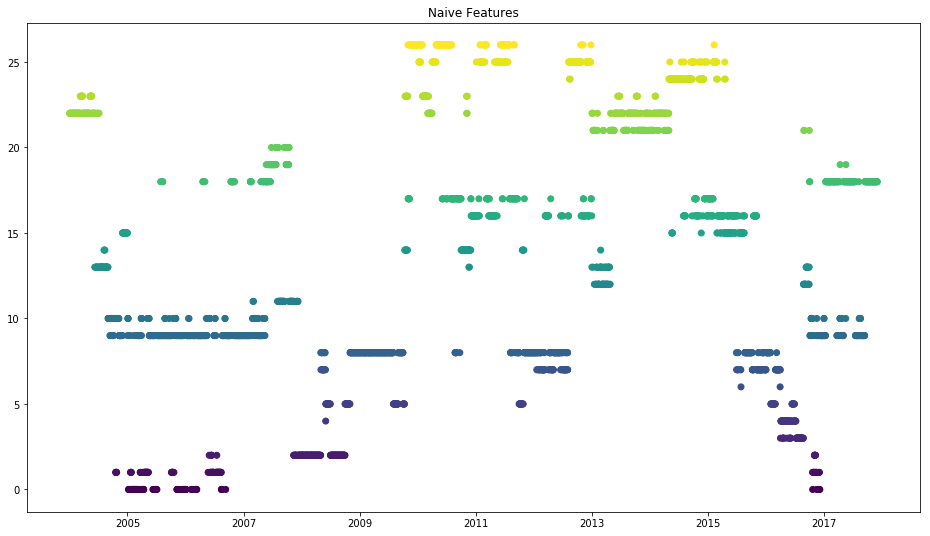

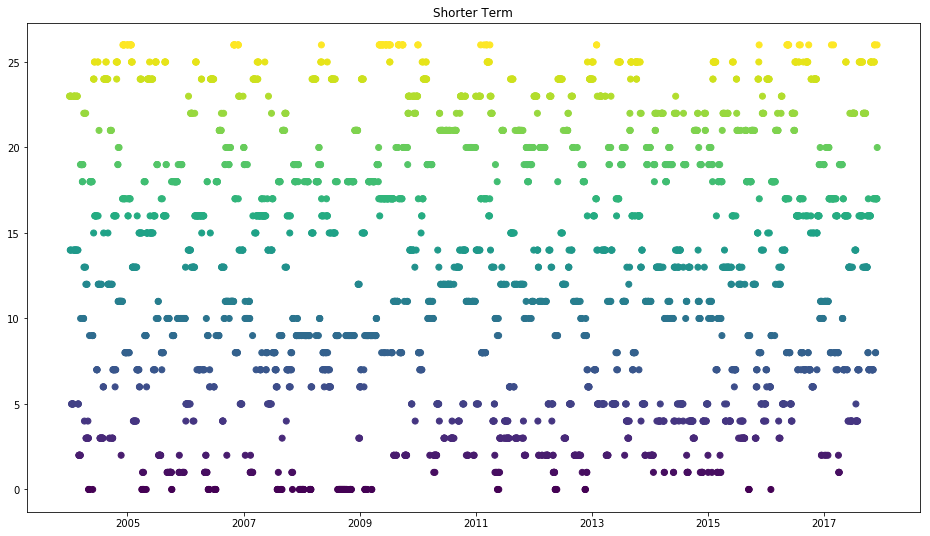

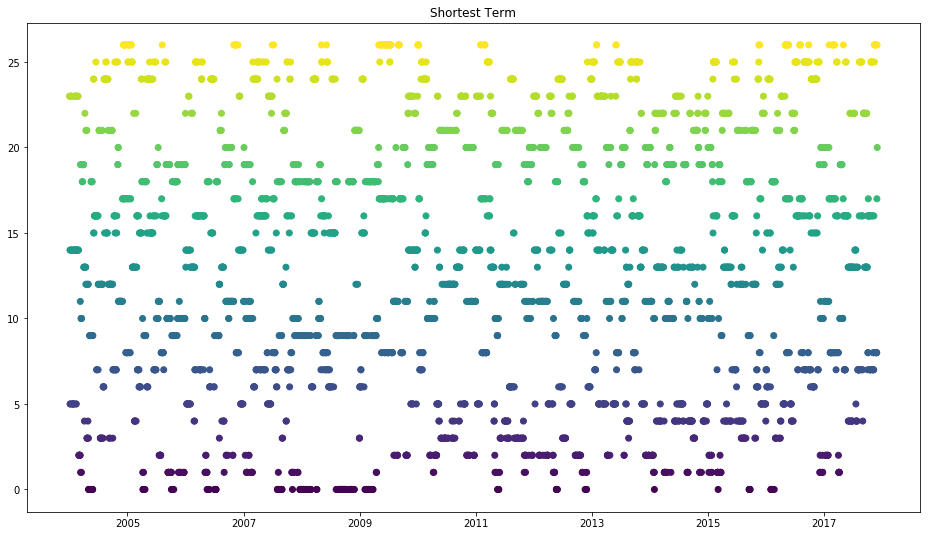

In [14]:
ENV_METRICS = ['t3m', 'ps-1mdelat', 'vixD1m']
visualize_state_distribution(ENV_METRICS, title='Current Features')

#NAIVE TRIAL
ENV_METRICS = ['vix', 'personal savings', 'ttm']
visualize_state_distribution(ENV_METRICS, title='Naive Features')

#Shorter Term
ENV_METRICS = ['t3m', 'ps-1mdelat', 'vixD2w']
visualize_state_distribution(ENV_METRICS, title='Shorter Term')

#Shortest Term
ENV_METRICS = ['t3m', 'ps-1mdelat', 'vixD1w']
visualize_state_distribution(ENV_METRICS, title='Shortest Term')

In [15]:
def visualize_state_distribution_3d(ENV_METRICS, title='3d'):
    #3D Visualization
    metric1 = [item for item in items if item.metric==ENV_METRICS[0]][0]
    metric2 = [item for item in items if item.metric==ENV_METRICS[1]][0]
    metric3 = [item for item in items if item.metric==ENV_METRICS[2]][0]
    series1= pd.Series(metric1.time_series)
    utils.strings_to_date(series1)
    series2 = pd.Series(metric2.time_series)
    utils.strings_to_date(series2)
    series3 = pd.Series(metric3.time_series)
    utils.strings_to_date(series3)
    df = pd.concat([series1, series2, series3], axis=1).fillna(method='ffill')
    df = df['20040102':'20171201']
    bucket1 = pd.Series([utils.METRIC_DICT[ENV_METRICS[0]](val) for val in df[0]])
    bucket2 = pd.Series([utils.METRIC_DICT[ENV_METRICS[1]](val) for val in df[1]])
    bucket3 = pd.Series([utils.METRIC_DICT[ENV_METRICS[2]](val) for val in df[2]])
    df2 = pd.concat([bucket1, bucket2, bucket3], axis=1)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df2.index, df2[0], df2[1], c=df2[2], cmap='viridis')
    ax.set_xlabel(title)

### Closest axis is time, other axis is first metric, z-axis is second metric, color is third metric

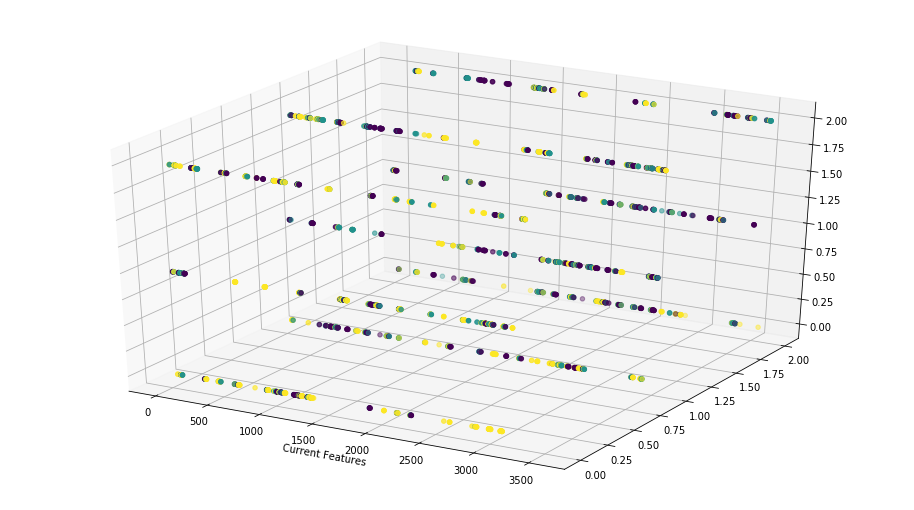

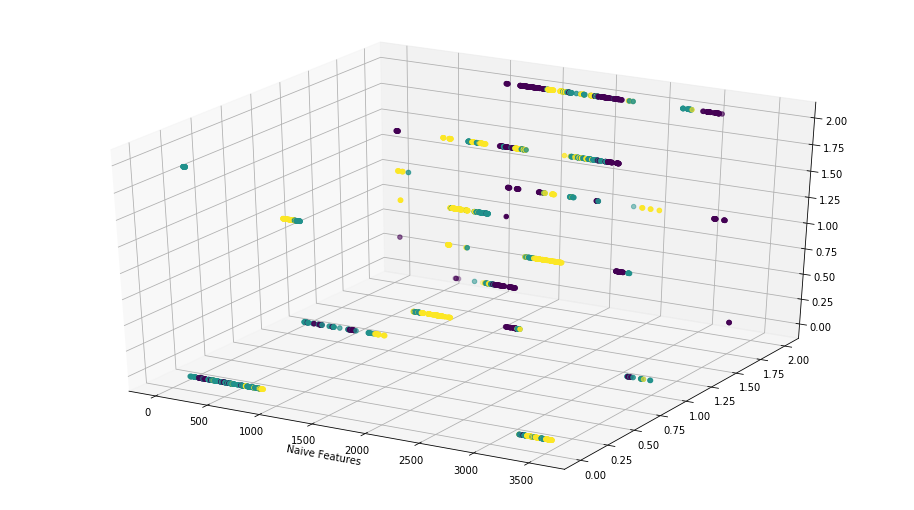

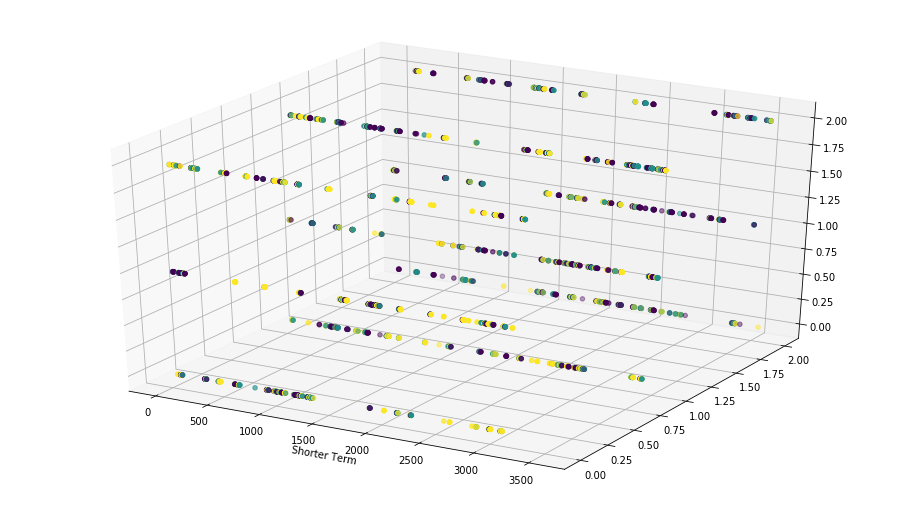

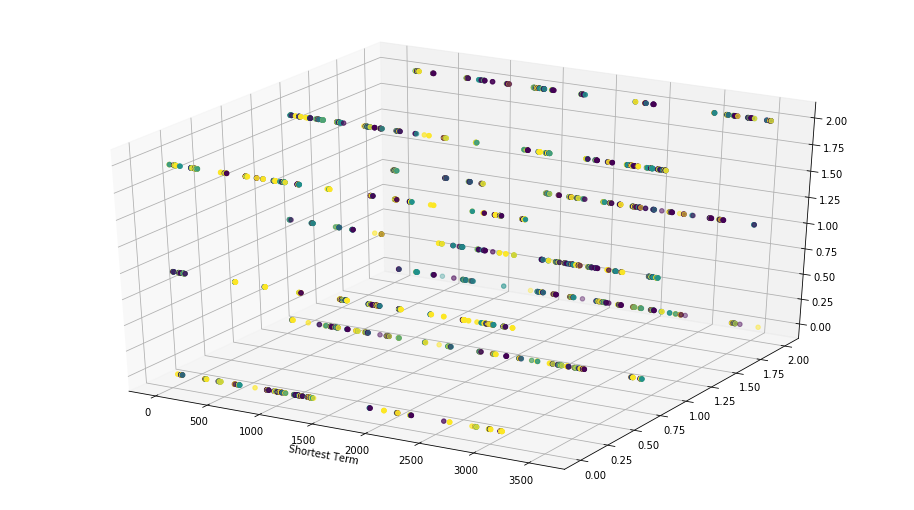

In [16]:
ENV_METRICS = ['t3m', 'ps-1mdelat', 'vixD1m']
visualize_state_distribution_3d(ENV_METRICS, title='Current Features')

#NAIVE TRIAL
ENV_METRICS = ['vix', 'personal savings', 'ttm']
visualize_state_distribution_3d(ENV_METRICS, title='Naive Features')

#Shorter Term
ENV_METRICS = ['t3m', 'ps-1mdelat', 'vixD2w']
visualize_state_distribution_3d(ENV_METRICS, title='Shorter Term')

#Shortest Term
ENV_METRICS = ['t3m', 'ps-1mdelat', 'vixD1w']
visualize_state_distribution_3d(ENV_METRICS, title='Shortest Term')

# Examining Time Series Dimensionality

In these, I believe a mass of unclustered data is better - it means that the samples are quite varied throughout time.

The color map here are the dates

In [17]:
#2-component PCA on factors: (NON-BUCKETED)
from sklearn.decomposition import PCA
def visualize_PCA(ENV_METRICS, title='pca'):
    metric1 = [item for item in items if item.metric==ENV_METRICS[0]][0]
    metric2 = [item for item in items if item.metric==ENV_METRICS[1]][0]
    metric3 = [item for item in items if item.metric==ENV_METRICS[2]][0]
    series1= pd.Series(metric1.time_series)
    utils.strings_to_date(series1)
    series2 = pd.Series(metric2.time_series)
    utils.strings_to_date(series2)
    series3 = pd.Series(metric3.time_series)
    utils.strings_to_date(series3)
    df = pd.concat([series1, series2, series3], axis=1).fillna(method='ffill')
    df = df['20040102':'20171201']
    samples = df.as_matrix()
    pca = PCA(n_components=2, svd_solver='full')
    x_new = pca.fit_transform(samples)
    x_new = np.array([x_new[:, 0], x_new[:, 1]])
    plt.scatter(x_new[0], x_new[1], c=np.arange(len(df.index)),cmap='viridis')
    plt.title(title)
    plt.show()

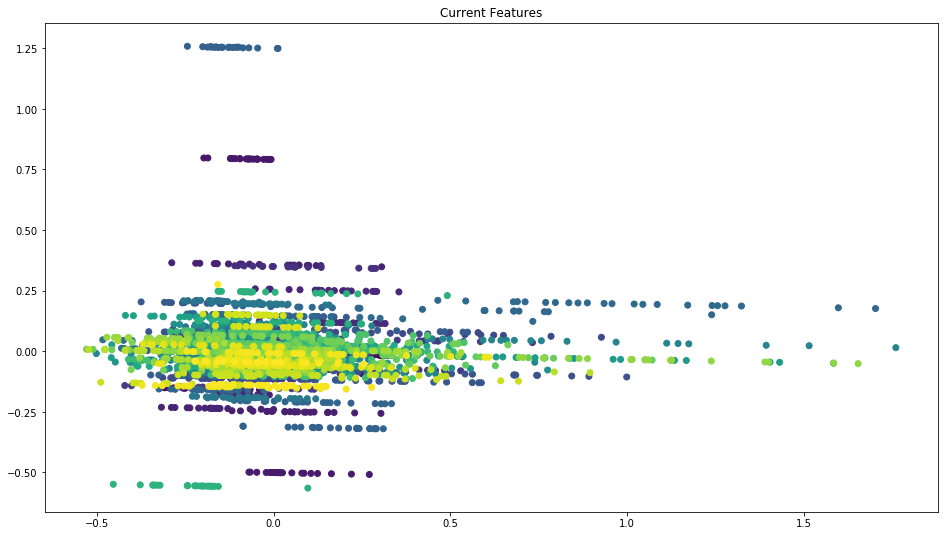

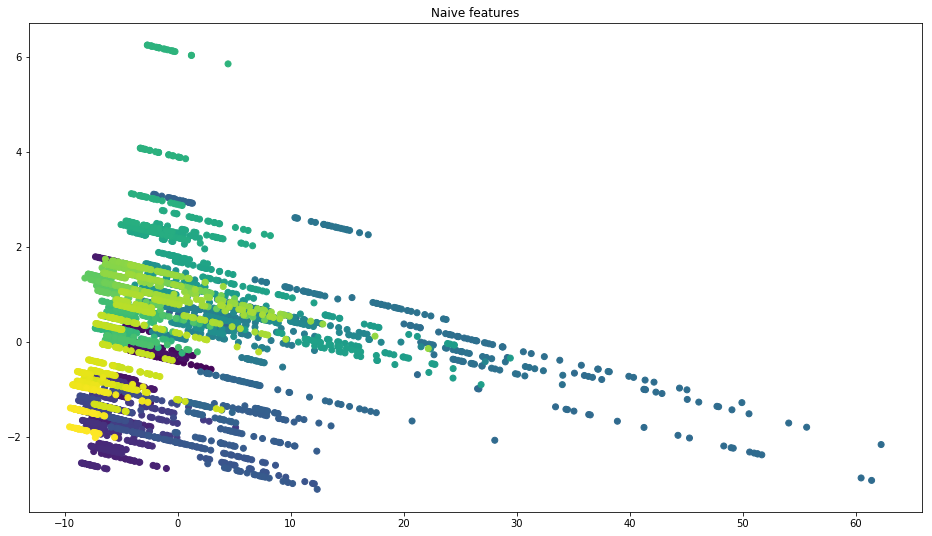

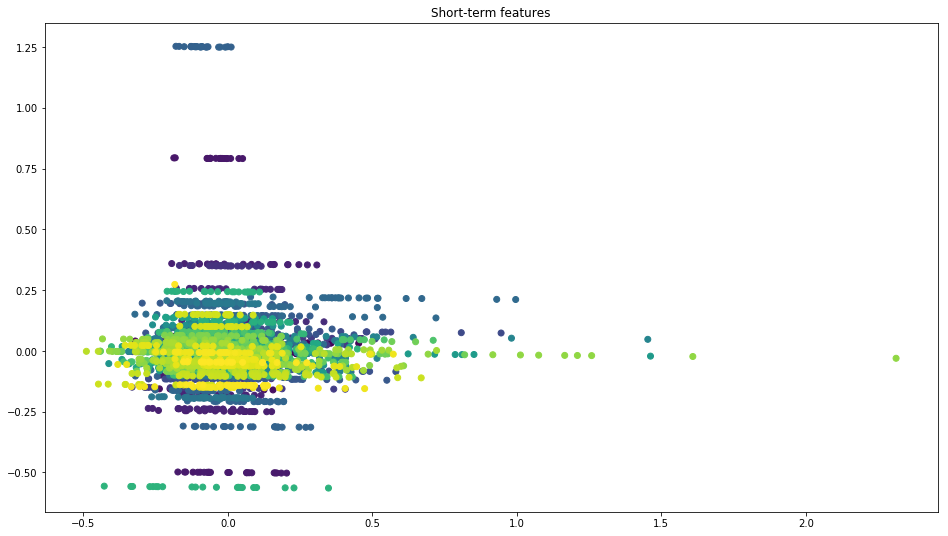

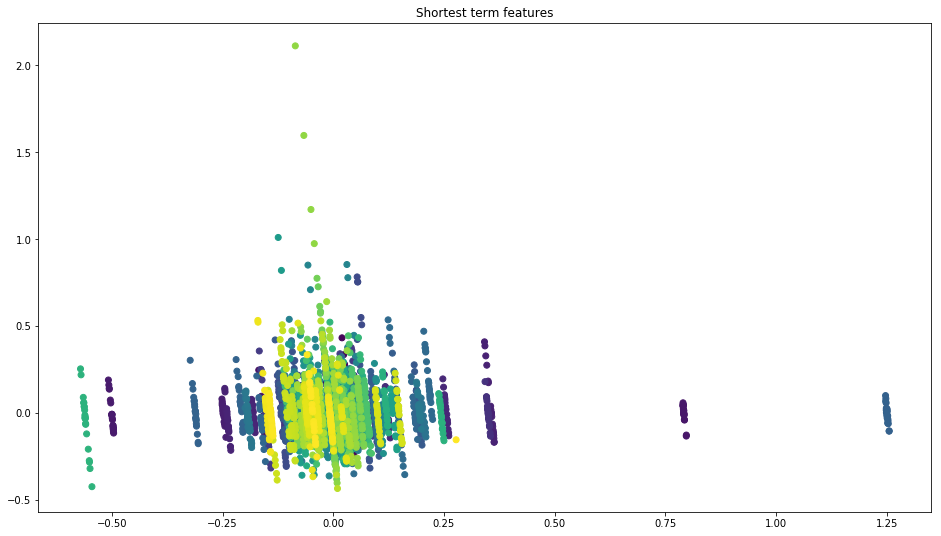

In [18]:
ENV_METRICS = ['t3m', 'ps-1mdelat', 'vixD1m']
visualize_PCA(ENV_METRICS, title='Current Features')

#NAIVE TRIAL
ENV_METRICS = ['vix', 'personal savings', 'ttm']
visualize_PCA(ENV_METRICS, title='Naive features')

#Shorter Term
ENV_METRICS = ['t3m', 'ps-1mdelat', 'vixD2w']
visualize_PCA(ENV_METRICS, title='Short-term features')

#Shortest Term
ENV_METRICS = ['t3m', 'ps-1mdelat', 'vixD1w']
visualize_PCA(ENV_METRICS, title='Shortest term features')

In [19]:
from sklearn.manifold import TSNE
def visualize_TSNE(ENV_METRICS, title='tsne'):
    metric1 = [item for item in items if item.metric==ENV_METRICS[0]][0]
    metric2 = [item for item in items if item.metric==ENV_METRICS[1]][0]
    metric3 = [item for item in items if item.metric==ENV_METRICS[2]][0]
    series1= pd.Series(metric1.time_series)
    utils.strings_to_date(series1)
    series2 = pd.Series(metric2.time_series)
    utils.strings_to_date(series2)
    series3 = pd.Series(metric3.time_series)
    utils.strings_to_date(series3)
    df = pd.concat([series1, series2, series3], axis=1).fillna(method='ffill')
    df = df['20040102':'20171201']
    samples = df.as_matrix()
    tsne = TSNE(n_components=2)
    x_new = tsne.fit_transform(samples)
    x_new = np.array([x_new[:, 0], x_new[:, 1]])
    plt.scatter(x_new[0], x_new[1], c=np.arange(len(df.index)),cmap='viridis')
    plt.title(title)
    plt.show()

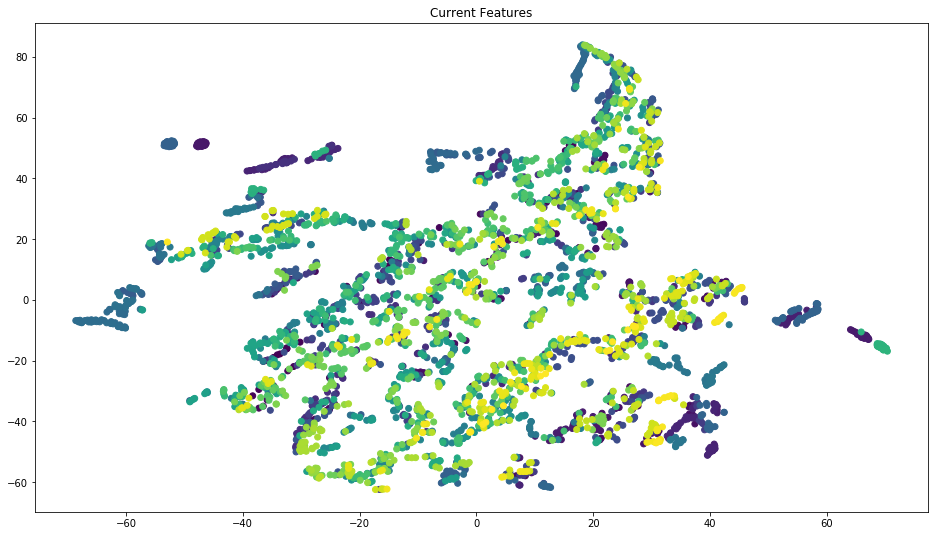

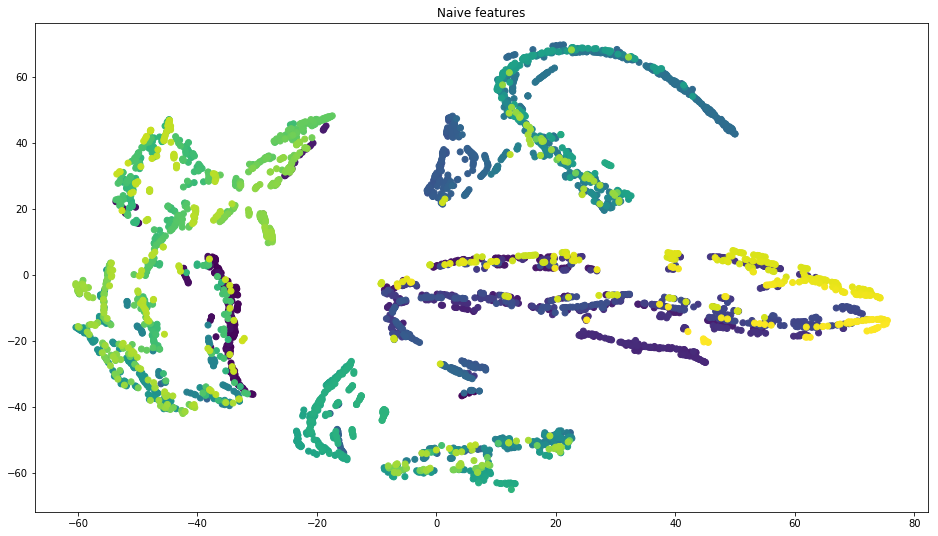

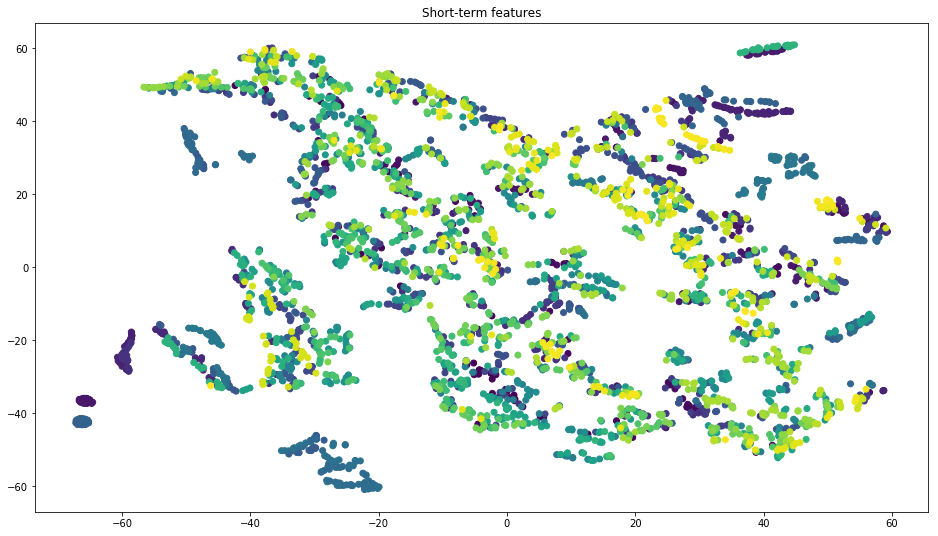

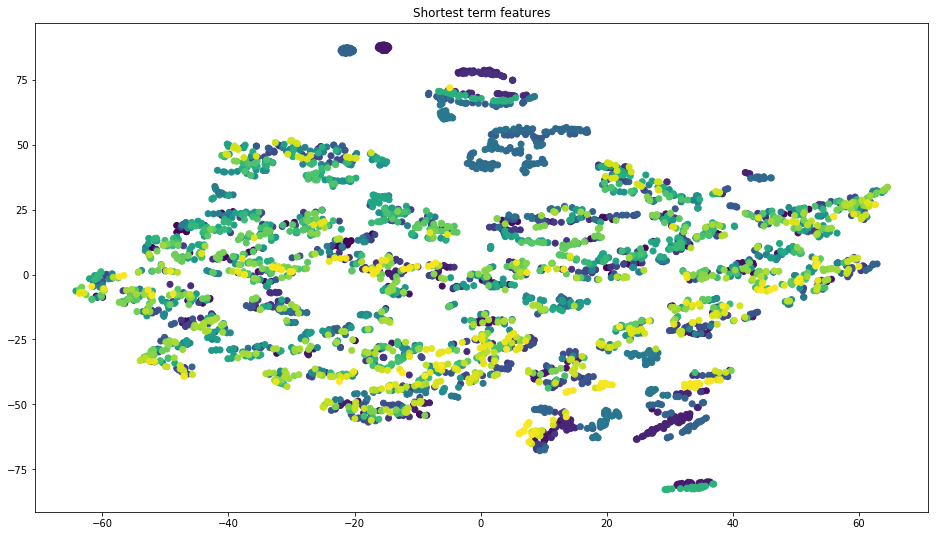

In [20]:
ENV_METRICS = ['t3m', 'ps-1mdelat', 'vixD1m']
visualize_TSNE(ENV_METRICS, title='Current Features')

#NAIVE TRIAL
ENV_METRICS = ['vix', 'personal savings', 'ttm']
visualize_TSNE(ENV_METRICS, title='Naive features')

#Shorter Term
ENV_METRICS = ['t3m', 'ps-1mdelat', 'vixD2w']
visualize_TSNE(ENV_METRICS, title='Short-term features')

#Shortest Term
ENV_METRICS = ['t3m', 'ps-1mdelat', 'vixD1w']
visualize_TSNE(ENV_METRICS, title='Shortest term features')